# Impact of Discount on Sales Revenue

### Introduction

Discount on purchases is one of the strategies used by sellers to boost their sales.  However, in adopting this strategy, there is a need to understand the make-up of the customers such that discounts are given to the right people.  There are those that will purchase the product irrespective of discounts given, in this scenario the utility of applying discounts to such customers is diminished, but there are instances in which certain customers will be motivated to make a purchase if a discount is given, in this situation, the value of discounts is optimized.

This project makes use of this [dataset](https://github.com/ifran-rahman/Customer_Data_Analysis) to understand how discount has impacted on sales revenue.

### Import the necessary libraries and dataset

In [1]:
import causallib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('sales_dataset.csv')
data.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,22.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,12.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,10.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,10.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,3.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


### Data Exploration

In [3]:
data.shape

(286392, 36)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [5]:
data['Discount_Percent'].value_counts()

0.000000     183086
20.000000     10510
10.000000      8459
15.000000      4985
9.000000       2074
              ...  
17.016538         1
17.128112         1
3.671476          1
12.241249         1
62.727273         1
Name: Discount_Percent, Length: 17133, dtype: int64

In [6]:
data['Region'].value_counts()

South        103482
Midwest       81299
West          51080
Northeast     50531
Name: Region, dtype: int64

In [7]:
data['category'].value_counts()

Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: category, dtype: int64

In [8]:
data['Name Prefix'].value_counts()

Mr.      103506
Ms.       60314
Mrs.      47247
Hon.      30439
Drs.      16180
Prof.     14939
Dr.       13767
Name: Name Prefix, dtype: int64

### Data Engineering, Cleaning and Selection

The exploration conducted above shows the following:

* There are 15 unique items of sales in the dataset, we shall restrict our analysis to 1 which is women's clothing
* Given that weather is one of the factors that determine quantity demanded, we shall create a column for season out of month column
* We shall categorize 'Name Prefix' column into two, those with Drs/Prof/Dr as a group and those without as a group to reflect ocuupational category
* Select relevant variables which are price, qty_ordered, value, total, name prefix, gender, customer since, region, discount percent
* We'll stick with region instead of state for location of buyers

### Features Needed

In [9]:
data.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [10]:
features = ['price', 'value', 'total', 'category',
'payment_method','Name Prefix', 'age','Region','Discount_Percent']

In [11]:
data_f = data[features]

In [12]:
data_f.head()

,price,value,total,category,payment_method,Name Prefix,age,Region,Discount_Percent
0,89.9,1798.0,1798.0,Men's Fashion,cod,Drs.,43.0,South,0.0
1,19.0,190.0,190.0,Men's Fashion,cod,Drs.,43.0,South,0.0
2,149.9,1199.2,1199.2,Men's Fashion,cod,Drs.,43.0,South,0.0
3,79.9,639.2,639.2,Men's Fashion,cod,Drs.,43.0,South,0.0
4,99.9,99.9,99.9,Men's Fashion,cod,Drs.,43.0,South,0.0


In [13]:
data_f.head()

,price,value,total,category,payment_method,Name Prefix,age,Region,Discount_Percent
0,89.9,1798.0,1798.0,Men's Fashion,cod,Drs.,43.0,South,0.0
1,19.0,190.0,190.0,Men's Fashion,cod,Drs.,43.0,South,0.0
2,149.9,1199.2,1199.2,Men's Fashion,cod,Drs.,43.0,South,0.0
3,79.9,639.2,639.2,Men's Fashion,cod,Drs.,43.0,South,0.0
4,99.9,99.9,99.9,Men's Fashion,cod,Drs.,43.0,South,0.0


In [14]:
# Add customer since to the data

data_f['customer_since'] = data['Customer Since']

In [15]:
data_f.head()

,price,value,total,category,payment_method,Name Prefix,age,Region,Discount_Percent,customer_since
0,89.9,1798.0,1798.0,Men's Fashion,cod,Drs.,43.0,South,0.0,8/22/2006
1,19.0,190.0,190.0,Men's Fashion,cod,Drs.,43.0,South,0.0,8/22/2006
2,149.9,1199.2,1199.2,Men's Fashion,cod,Drs.,43.0,South,0.0,8/22/2006
3,79.9,639.2,639.2,Men's Fashion,cod,Drs.,43.0,South,0.0,8/22/2006
4,99.9,99.9,99.9,Men's Fashion,cod,Drs.,43.0,South,0.0,8/22/2006


In [16]:
# Include order date to calculate years since buyers has been a customer

data_f['order_date'] = data['order_date']

In [17]:
# Calculate how long customer has been with the company

import datetime as dt

In [18]:
# convert the dates from string to dates

data_f['order_date'] = pd.to_datetime(data_f['order_date'])
data_f['customer_since'] = pd.to_datetime(data_f['customer_since'])

In [19]:
data_f['diff'] = data_f['order_date'] - data_f['customer_since']

In [20]:
data_f.head()

,price,value,total,category,payment_method,Name Prefix,age,Region,Discount_Percent,customer_since,order_date,diff
0,89.9,1798.0,1798.0,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154 days
1,19.0,190.0,190.0,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154 days
2,149.9,1199.2,1199.2,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154 days
3,79.9,639.2,639.2,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154 days
4,99.9,99.9,99.9,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-11-13,5197 days


In [21]:
data_f['diff'] = data_f['diff'].dt.days

In [22]:
data_f['diff'].describe()

count    286392.000000
mean       4903.050633
std        3152.496378
min        1162.000000
25%        2259.000000
50%        4015.000000
75%        6768.000000
max       15538.000000
Name: diff, dtype: float64

### Create customer duration and month column for seasons

In [23]:
# Create a month column and delete days columns

data_f['customer_duration'] = round(data_f['diff']/365,0)

In [24]:
data_f['customer_duration'].head()

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: customer_duration, dtype: float64

In [25]:
data_f['Month'] = data_f.order_date.dt.month_name(locale="English")

In [26]:
data_f.head()

,price,value,total,category,payment_method,Name Prefix,age,Region,Discount_Percent,customer_since,order_date,diff,customer_duration,Month
0,89.9,1798.0,1798.0,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154,14.0,October
1,19.0,190.0,190.0,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154,14.0,October
2,149.9,1199.2,1199.2,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154,14.0,October
3,79.9,639.2,639.2,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-10-01,5154,14.0,October
4,99.9,99.9,99.9,Men's Fashion,cod,Drs.,43.0,South,0.0,2006-08-22,2020-11-13,5197,14.0,November


In [27]:
# Create 4 seasons

def season(x):
    if x in ['March','April','May']:
        return 'Spring'
    elif x in ['June','July','August']:
        return 'Summer'
    elif x in ['September','October','November']:
        return 'Fall'
    else:
        return 'Winter'

In [28]:
data_f['season'] = data_f['Month'].apply(season)

In [29]:
data_f['season'].value_counts()

Winter    109881
Spring     83805
Summer     53572
Fall       39134
Name: season, dtype: int64

In [30]:
# create 2 categories of professions from name_prefix

def status(x):
    if x in ['Drs.','Dr.','Prof.']:
        return 'Higher_Status'
    else:
        return 'Lower_Status'

In [31]:
data_f['status'] = data_f['Name Prefix'].apply(status)

### Select the relevant features

In [32]:
data_f.columns

Index(['price', 'value', 'total', 'category', 'payment_method', 'Name Prefix',
       'age', 'Region', 'Discount_Percent', 'customer_since', 'order_date',
       'diff', 'customer_duration', 'Month', 'season', 'status'],
      dtype='object')

In [33]:
relfeatures = ['price','total', 'category','age', 'Region','Discount_Percent', 
               'customer_duration','season','status']

In [34]:
df = data_f[relfeatures]

In [35]:
df.shape

(286392, 9)

In [36]:
# Select dataframe for women's Fashion

df = df[df['category']=="Women's Fashion"]

In [37]:
df.shape

(28334, 9)

In [38]:
df['Discount_Percent'].value_counts()

0.000000     22025
20.000000     1439
10.000000      694
15.000000      517
5.000000       182
             ...  
15.666614        1
15.666614        1
15.666615        1
30.401338        1
31.321818        1
Name: Discount_Percent, Length: 2020, dtype: int64

#### Create Control and Treatment Population

In [39]:
# Drop category column

df = df.drop('category',axis=1)

In [40]:
control_pop = df[df['Discount_Percent']==0.00]
Treatment_pop = df[df['Discount_Percent']>0.00]

In [41]:
control_pop.shape

(22025, 8)

In [42]:
Treatment_pop.shape

(6309, 8)

In [43]:
control_pop['treatment'] = 0

In [44]:
Treatment_pop['treatment']=1

In [45]:
control_pop.head()

,price,total,age,Region,Discount_Percent,customer_duration,season,status,treatment
29,140.0,140.0,65.0,Midwest,0.0,10.0,Fall,Lower_Status,0
72,379.8,379.8,71.0,Midwest,0.0,4.0,Winter,Lower_Status,0
158,175.0,175.0,71.0,South,0.0,35.0,Fall,Lower_Status,0
165,119.9,119.9,64.0,South,0.0,15.0,Winter,Lower_Status,0
205,121.5,121.5,75.0,South,0.0,18.0,Fall,Lower_Status,0


In [46]:
Treatment_pop.head()

,price,total,age,Region,Discount_Percent,customer_duration,season,status,treatment
166,140.0,126.0,64.0,South,10.0,15.0,Winter,Lower_Status,1
167,125.0,112.5,64.0,South,10.0,15.0,Winter,Lower_Status,1
168,125.0,112.5,64.0,South,10.0,15.0,Winter,Lower_Status,1
169,140.0,126.0,64.0,South,10.0,15.0,Winter,Lower_Status,1
170,140.0,126.0,64.0,South,10.0,15.0,Winter,Lower_Status,1


In [47]:
# Remove Discount_Percent from both groups

control_pop = control_pop.drop('Discount_Percent',axis=1)
Treatment_pop = Treatment_pop.drop('Discount_Percent',axis=1)

In [48]:
# Rename total as Sales, and customer_duration as duration in both groups

new_names = {'total':'outcome','customer_duration':'duration'}

control_pop.rename(columns=new_names,inplace=True)
Treatment_pop.rename(columns=new_names,inplace=True)

### Data Sampling to select treatment and control samples

For our sampling, we shall use power analysis where we want the effect size to be 0.2 (small effect), alpha = 0.05 and Power = 0.8 (High)

In [49]:
from statsmodels.stats.power import TTestIndPower

In [50]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.2,alpha=0.05,power=0.8,alternative='two-sided')
print('The sample size needed for each group is',round(sample_size))

The sample size needed for each group is 393


Since we have enough data to play around with, we shall select 600 from each group

In [51]:
control_group = control_pop.sample(n=600,random_state=42)
treatment_group = Treatment_pop.sample(n=600,random_state=42)

In [52]:
# combine the datasets

df_data = pd.concat([control_group,treatment_group],axis=0)

In [53]:
df_data.shape

(1200, 8)

In [54]:
df_data.head()

,price,outcome,age,Region,duration,season,status,treatment
211297,149.7,149.7,52.0,South,10.0,Spring,Higher_Status,0
187358,79.9,79.9,63.0,Northeast,6.0,Spring,Lower_Status,0
174479,51.9,51.9,57.0,South,9.0,Spring,Lower_Status,0
277946,300.0,300.0,37.0,Midwest,16.0,Summer,Lower_Status,0
269824,539.0,539.0,60.0,Northeast,34.0,Summer,Lower_Status,0


In [55]:
df_data.tail()

,price,outcome,age,Region,duration,season,status,treatment
213176,239.0,544.50,39.0,Midwest,26.0,Spring,Lower_Status,1
37837,79.0,0.00,45.0,South,6.0,Fall,Lower_Status,1
162173,99.9,159.84,69.0,Midwest,8.0,Winter,Lower_Status,1
159539,295.0,472.00,68.0,South,7.0,Spring,Higher_Status,1
84392,454.3,648.60,28.0,South,20.0,Winter,Lower_Status,1


In [56]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 211297 to 84392
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      1200 non-null   float64
 1   outcome    1200 non-null   float64
 2   age        1200 non-null   float64
 3   Region     1200 non-null   object 
 4   duration   1200 non-null   float64
 5   season     1200 non-null   object 
 6   status     1200 non-null   object 
 7   treatment  1200 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 84.4+ KB


### Initial analysis

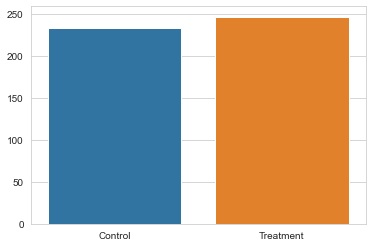

Difference between Control and Treatment 13.90749


In [57]:
sns.set_style("whitegrid")
sns.barplot(x = ['Control', 'Treatment'], y = df_data.groupby('treatment')['outcome'].mean().values)
plt.show()
print(f'Difference between Control and Treatment {np.round(df_data.groupby("treatment")["outcome"].mean()[1] - df_data.groupby("treatment")["outcome"].mean()[0], 5)}')

It appears that discount leads to a mean increase of $14

### Create variables for causallib

In [58]:
X = df_data.drop(['treatment','outcome'],axis=1)
X = pd.get_dummies(X,drop_first=True,prefix_sep=('*'))

In [59]:
a = df_data['treatment']
y = df_data['outcome']

In [60]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib import pyplot as plt
from causallib.estimation import (
    PropensityFeatureStandardization,
    WeightedStandardization,
    AIPW,
    IPW,
    MarginalOutcomeEstimator,
    Standardization,
    StratifiedStandardization,
    Matching,
    PropensityMatching,
)
from causallib.preprocessing.transformers import MatchingTransformer


def learner(): return LogisticRegression(
    solver="liblinear", class_weight="balanced", max_iter=5000)


def makeipw(): return IPW(learner=learner())
def makestd(): return StratifiedStandardization(learner=LinearRegression())


all_estimators = [
    MarginalOutcomeEstimator(learner=LinearRegression()),
    Matching(with_replacement=False),
    PropensityMatching(learner=learner(), caliper=0.1),
    IPW(learner=learner()),
    Standardization(learner=LinearRegression()),
    StratifiedStandardization(learner=LinearRegression()),
    PropensityFeatureStandardization(makestd(), makeipw()),
    WeightedStandardization(makestd(), makeipw()),
    AIPW(makestd(), makeipw()),
]


def get_all_estimates(X, a, y):
    estimates = {}
    for estimator in all_estimators:
        estimator.fit(X, a, y)
        estimator_name = estimator.__class__.__name__
        estimates[estimator_name] = estimator.estimate_population_outcome(
            X, a, y)
    estimates_df = pd.concat(estimates, axis=1).T
    return estimates_df

In [61]:
all_estimates = get_all_estimates(X, a, y)
all_estimates.assign(ATE=all_estimates[1] - all_estimates[0])

,0,1,ATE
MarginalOutcomeEstimator,232.967375,246.874861,13.907486
Matching,232.967375,246.874861,13.907486
PropensityMatching,239.379996,245.190906,5.810910
IPW,486.721564,238.228390,-248.493173
Standardization,244.155625,235.686610,-8.469015
StratifiedStandardization,242.957624,233.355192,-9.602433
PropensityFeatureStandardization,243.213546,232.222708,-10.990838
WeightedStandardization,242.769819,231.295794,-11.474025
AIPW,241.567334,231.766733,-9.800601


In [62]:
from causallib.preprocessing.transformers import PropensityTransformer
propensity_transform = PropensityTransformer(learner=learner(), include_covariates=True)

In [63]:
mt = MatchingTransformer(with_replacement=False, propensity_transform=propensity_transform)
Xm, am, ym = mt.fit_transform(X, a, y)
print(f"Transforming data from {X.shape[0]} samples to {Xm.shape[0]} samples by matching without replacement.")

Transforming data from 1200 samples to 1200 samples by matching without replacement.


In [64]:
all_estimates_matched = get_all_estimates(Xm, am, ym)
all_estimates_matched.assign(ATE=all_estimates_matched[1] - all_estimates_matched[0])

,0,1,ATE
MarginalOutcomeEstimator,232.967375,246.874861,13.907486
Matching,232.967375,246.874861,13.907486
PropensityMatching,239.379996,245.190906,5.810910
IPW,486.721564,238.228390,-248.493173
Standardization,244.155625,235.686610,-8.469015
StratifiedStandardization,242.957624,233.355192,-9.602433
PropensityFeatureStandardization,243.213546,232.222708,-10.990838
WeightedStandardization,242.769819,231.295794,-11.474025
AIPW,241.567334,231.766733,-9.800601


### Conclusion

All the matching methods report a positive impact of discounts on sales revenue while the other methods report negative impact.  Looking at the weighting and standardization approaches, they all have similar results except for IPW with very high ATE of -248.  This is understandable in that IPW is sensitive to treatment specification error, however, the AIPW (Doubly Robust) method provide a better and realistic estimate.

In this experiment, it can be established that sales discount does not have the desired effect on sales.  However, we shall pursue this further by looking at the effect of different level of discounts on sales.